# MARKOV CHAIN MONTE CARLO METHODS FOR SAMPLING
By Chance Emanuels

11/14/2019

Bradley University



Source: https://drive.google.com/file/d/1SdypuEITjY8fBmSJNtkJ09SVeBPJWY15/view

Source: https://towardsdatascience.com/mcmc-intuition-for-everyone-5ae79fff22b1

Source: https://towardsdatascience.com/from-scratch-bayesian-inference-markov-chain-monte-carlo-and-metropolis-hastings-in-python-ef21a29e25a

Source: http://heather.cs.ucdavis.edu/~matloff/LaTeX/Markov.tex


## Purpose is to try to compute the area under a curve based on sampled points. 
Most Popular technique for sampling from complicated posterior probability distributions (in general = any probability distribution for multi-variate data)

* Markov Propery: Given a process which is at state "Xn" at a particular point of time, the probability of Xn+1 = k, Where K is any of the M states the process can jump to, will only be dependent on which state it is at the given moment. 

 

In Application: Long-run distribution 
    \begin{equation}
\label{limnt}
\pi_{i}=\lim_{t\rightarrow \infty }\frac{N_{it}}{t}
\end{equation}
* long-run proportion of the time that we are at position for each state i, define
* where $N_{it}$ is the number of visits the process makes to state i among times 1, 2,..., t.

Stationary Distribution:
\begin{equation}
\label{limxt}
\lim_{t\rightarrow \infty }P(X_{t}=i)=\pi_{i}
\end{equation}

* Practically speaking, this proportion will exist and be independent of our initial position $X_{0}$.
* The $\pi_i$ are called the {\bf steady-state probabilities}, or the {\bf stationary distribution} of the Markov chain.

Steady-state: as t approaches infinity
    \begin{equation}
\label{limxt}
\lim_{t\rightarrow \infty }P(X_{t}=i)=\pi_{i}
\end{equation}

Example: 

Area of the transcendental number $\pi$ can be computed by sampling points within a square of radius 1 and noting down the number of sampled points within one-fourth of the circle of diameter 2 enclosed within the sqaure. 

$$4* \frac{Area (OAC)}{Area (OABC)}= 4* \frac{\frac{1}{4}*\pi*r^2}{r^2}$$

In [1]:
# Compuation of Pi through Monte Carlo Sampling
import numpy as np
number_sample = 10000000
inner_area, outer_area = 0,0 
for i in range(number_sample):
    x = np.random.uniform(0,1)
    y = np.random.uniform(0 ,1)
    if (x**2 + y**2) < 1 :
        inner_area += 1
    outer_area += 1
print( " the computed value of Pi: ", 4*(inner_area/float(outer_area)))


 the computed value of Pi:  3.14205


 Simple Monte Carlo Method is highly inefficient if the dimension space is large since the larger the dimensionality is the more prominent the effects of Correlation
    

In [2]:
# the main heuristic behind the Markov Chain Monte Carlo Method is to explore the probability space, because of correlation
# most of the space is sparse, with high density found only at specific areas. 
# Conclusion: Spend more time and collect more samples from those high-probabilty zones and spend as little time as possible exploring low-probabilty zones

## Markov Chain Description
1. Thought of as a stochastic/random process to generate a sequence of random samples evolving over time.
2. Once the chain enters a high-probability zone, it tries to collect as many points with a high-probability density as possible
3. This is done by generating the next sample,  conditioned on the current
sample value, so that points near the current sample are chosen with high probability and points far away
are chosen with low probability
4. step 3 ensures the MC collects as many points as possible from the HP zone


# Metropolis Algorithm 
Another Markov Chain Monte Carlo method

    1. uses the current accepted state to determine the next state.
    2. At Sampling time: (t + 1) is conditionally dependent upon the sample at time t.
    3. The proposed sate at time (t+1) is drawn from the normal distribution with a mean equal to the current sample at time t with a specified variance. 
    4. the Ratio of the probability is checked between the sample at time (t+1) and at time t.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Markov Chain Monte Carol Methods called Metropolis
# transition probabilities would follow normal distribution 
import time
start_time = time.time()


In [4]:
# set up constants and initial varibale conditons
num_samples=100000
pro_density = 0
# plan is to sample from a bivariate gaussian distibution with mean (0,0) and covariance of .7 between two variables
mean = np.array([0,0])
cov = np.array([[1,.07],[.7,1]])
cov1 = np.matrix(cov)
mean1 = np.matrix(mean)
x_list, y_list = [], []
accepted_samples_count = 0
## normalizer of the probability distribution 
normalizer = np.sqrt(((2*np.pi)**2)*np.linalg.det(cov))
# start with initial point (0,0)
x_initial, y_initial = 0,0
x1, y1 = x_initial, y_initial

Time taken to sample 77968 points ==> 19.008643865585327 seconds
Acceptance ratio ===>  0.77968
Mean of the Sampled Points
0.007459836909931656 0.015025694037497374
Covariance matrix of the Sampled Points
[[1.05114384 0.41910478]
 [0.41910478 1.05024935]]


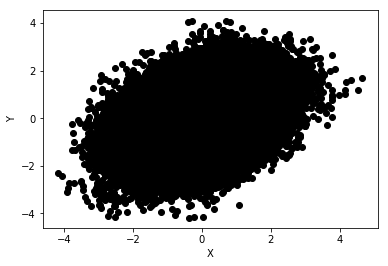

In [5]:
for i in range(num_samples):
    # set up conditional prob dis, taking the existing point
    # as the mean and a small variance = .2 so that points near the exisitng point
    # high chance of getting sampled
    mean_trans = np.array([x1,y1])
    cov_trans = np.array([[.2,0], [0,.2]])
    x2, y2 = np.random.multivariate_normal(mean_trans, cov_trans).T
    X = np.array([x2,y2])
    X1 = np.matrix(mean_trans)
    X2 = np.matrix(X)
    # compute the probability density of the existing point and the new sampled point
    mahalnobix_dist2 = (X2 - mean1)*np.linalg.inv(cov)*(X2 - mean1).T
    prob_density2 = (1/float(normalizer))*np.exp(-0.5*mahalnobix_dist2)
    mahalnobis_dist1 = (X1 - mean1)*np.linalg.inv(cov)*(X1 - mean1).T
    prob_density1 = (1/float(normalizer))*np.exp(-0.5*mahalnobis_dist1)
    # <3 of algorithm
        # COMPARING RATIO OF PROBABILITY DENSITY Of THE NEW
    acceptance_ratio = prob_density2[0,0] / float(prob_density1[0,0])
    
    if (acceptance_ratio >= 1)  |  ((acceptance_ratio < 1) and (acceptance_ratio >= np.random.uniform(0,1))):
        x_list.append(x2)
        y_list.append(y2)
        x1 = x2
        y1 = y2
        accepted_samples_count += 1
    end_time = time.time()
print ('Time taken to sample ' + str(accepted_samples_count) + ' points ==> ' + str(end_time -
start_time) + ' seconds' )
print('Acceptance ratio ===> ' , accepted_samples_count/float(100000))
## Time to display the samples generated
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x_list,y_list,color='black')
print("Mean of the Sampled Points")
print(np.mean(x_list),np.mean(y_list))
print("Covariance matrix of the Sampled Points")
print(np.cov(x_list,y_list))
        